In [47]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt, date

# 61.np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [166]:
numbers = np.arange(1,31)
numbers = numbers.reshape(6,5)
result = numbers[[2,2,3,3],[0,1,0,1]]   
print(result)

[11 12 16 17]


# 62.Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

In [29]:
df = pd.read_excel('HospitalDatabase.xlsx','EDVisits')
df = pd.DataFrame(df, columns=['EDDisposition','Acuity'])
df.reset_index().groupby( [ "EDDisposition", "Acuity"],as_index=False ).count()

,EDDisposition,Acuity,index
0,Admitted,1,32
1,Admitted,2,116
2,Admitted,3,81
3,Admitted,4,107
4,Admitted,5,179
5,Discharged,1,558
6,Discharged,2,66
7,Discharged,4,30
8,Discharged,5,30


# 63.List male patients over the age of 60 who have undergone surgery from January-March 2019.

In [144]:
df1 = pd.read_excel('HospitalDatabase.xlsx','Patients')
df2 = pd.read_excel('HospitalDatabase.xlsx','AmbulatoryVisits')
df = pd.merge(df1, df2 on='PatientID')
df = pd.DataFrame(df, columns=['PatientID' ,'DateOfBirth','Gender','ProviderID','ProviderSpecialty'])

now = pd.to_datetime('now')
#calculate Age
df['Age']=(now - df['DateOfBirth']).astype('<m8[Y]') 

#male patients over the age of 60
rs_df = df[(df['Age'] > 60) & (df['Gender']=='Male')]
rs_d = rs_df & (df['Service']='')


SyntaxError: invalid syntax (484532737.py, line 3)

# 64.Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [23]:
df = pd.read_excel('HospitalDatabase.xlsx','Providers')
df = pd.DataFrame(df, columns=['ProviderName'])
df[['First Name', 'Last Name']] = df['ProviderName'].str.split(' ', 1, expand=True) #split the name using space 
df   # print the provider name ,first name and Last name

,ProviderName,First Name,Last Name
0,Sally Sue,Sally,Sue
1,Mike Myers,Mike,Myers
2,Jordan Michael,Jordan,Michael
3,Ted Texas,Ted,Texas
4,Ala Bama,Ala,Bama
5,Harry Kane,Harry,Kane
6,Barry Bar,Barry,Bar
7,Ted Green,Ted,Green
8,Ted Black,Ted,Black
9,Fred Man,Fred,Man


# 65.Plot a graph showing the count of patients for the reason visited the hospital.

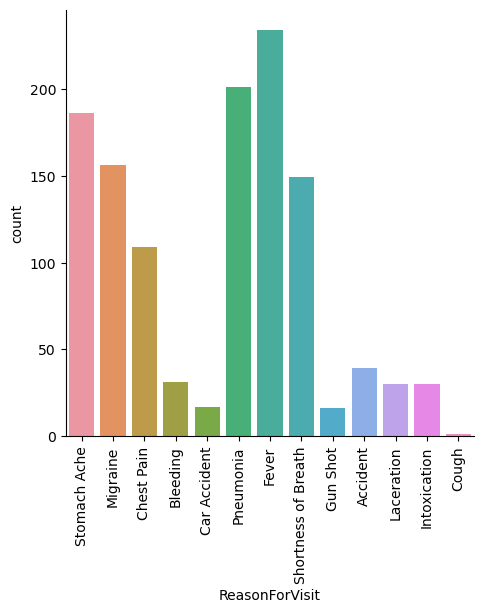

In [10]:
df = pd.read_excel('HospitalDatabase.xlsx','EDVisits')
df = pd.DataFrame(df, columns=['ReasonForVisit','PatientID'])
sns.catplot(x = "ReasonForVisit", kind = "count", data = df )

    
plt.xticks(rotation=90)
plt.show()


ax = sns.countplot(df["coltype"], 
                   order = df["coltype"].value_counts().index)

for p, label in zip(ax.patches, df["coltype"].value_counts().index):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))

# 66.Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.

In [164]:
df1 = pd.read_excel('HospitalDatabase.xlsx','Patients')
df2 = pd.read_excel('HospitalDatabase.xlsx','EDVisits')
df = pd.merge(df1, df2, on='PatientID')
rs_df = df[df['ReasonForVisit'] == 'Migraine' ]
rs_df[['FirstName', 'LastName' , 'DateOfBirth' , 'ReasonForVisit']]
print(rs_df)

      PatientID  FirstName  LastName             DateOfBirth  Gender  \
3             2        Far     Myers 1985-11-15 02:08:42.090    Male   
4             3    Devlin    Michael 1976-04-15 02:52:09.762    Male   
18            7    Skipton       Bar 1975-11-25 22:23:53.525    Male   
20            8  Alexandra     Green 1967-06-16 16:37:21.694    Male   
24           10     Granny       Man 1969-09-15 11:20:42.218    Male   
...         ...        ...       ...                     ...     ...   
1150        897    Barrows  Coupland 1979-10-31 18:28:35.483    Male   
1161        908       Knox     Group 1975-08-25 22:27:50.177    Male   
1163        910    Kuvalis  Coupland 1986-05-23 19:23:27.752    Male   
1168        915   Jerrilyn     Dyson 1978-01-18 02:41:55.178  Female   
1177        924     Daniel  Shakesby 1980-11-28 17:57:03.702    Male   

                        Race Language  EDVisitID               VisitDate  \
3                      White  English          2 2020-01-01

# 67.Make a pivot table by the no. of patients from the admission date till discharge date.

In [23]:
df = pd.read_excel('HospitalDatabase.xlsx','ReAdmissionRegistry')
df = pd.DataFrame(df, columns=['AdmissionDate' , 'DischargeDate' , 'PatientID'])
display(pd.pivot_table(df, index = ["AdmissionDate" , "DischargeDate"]))

PatientID
AdmissionDate DischargeDate                     
2018-01-01    2018-01-04 19:59:31.391          1
              2018-01-04 21:28:51.898          2
              2018-01-04 22:28:23.672          3
              2018-01-05 05:47:04.933          5
              2018-01-05 14:18:30.029          6
...                                          ...
2018-02-22    2018-03-07 21:22:10.061        738
              2018-03-08 02:43:18.749        739
              2018-03-08 09:27:18.377        740
              2018-03-10 06:06:12.068        741
              2018-03-10 20:38:30.568        742

[720 rows x 1 columns]

# 68.Calculate average LOS.

In [63]:
from datetime import datetime

df = pd.read_excel('HospitalDatabase.xlsx','Discharges')
df = pd.DataFrame(df, columns=['AdmissionDate' , 'DischargeDate' , 'PatientID'])

admission_dates = df.AdmissionDate
discharge_dates = df.DischargeDate






# 69.Number of patients on 'Transfer' based on primary diagnosis.

In [163]:
df = pd.read_excel('HospitalDatabase.xlsx','ReAdmissionRegistry')
df = pd.DataFrame(df, columns=['PrimaryDiagnosis' , 'DischargeDisposition' , 'PatientID'])
rs_df = df[df['DischargeDisposition'] == 'Transfer' ]
rs_df[['PrimaryDiagnosis' , 'DischargeDisposition' , 'PatientID']]
rs_df.groupby(['PrimaryDiagnosis','DischargeDisposition'])['PatientID'].count()

PrimaryDiagnosis  DischargeDisposition
Afib              Transfer                1
Diabetes          Transfer                7
Flu               Transfer                2
Heart Failure     Transfer                9
Knee Replacement  Transfer                1
Laceration        Transfer                1
Pain              Transfer                1
Pneumonia         Transfer                8
Stroke            Transfer                9
Name: PatientID, dtype: int64

# 70.Violin plot for Level of Acuity by Visit Reason

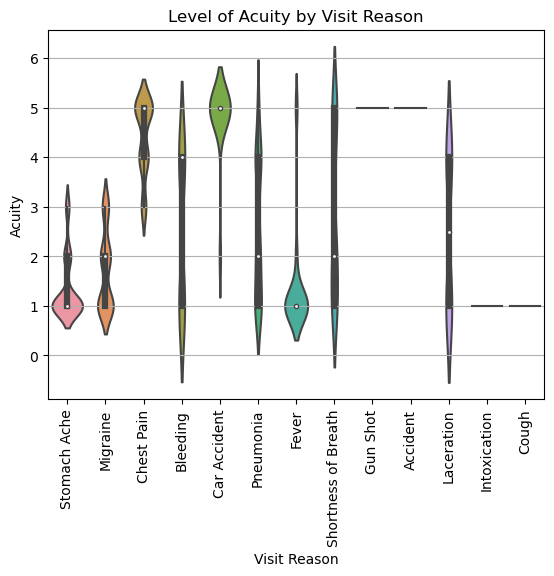

In [162]:
import warnings
warnings.filterwarnings("ignore")
df = pd.read_excel('HospitalDatabase.xlsx','EDVisits')
df = pd.DataFrame(df, columns=['ReasonForVisit','PatientID','Acuity'])
fig, axes = plt.subplots()
sns.violinplot("ReasonForVisit",'Acuity', data=df, ax = axes)
axes.set_title('Level of Acuity by Visit Reason')
axes.yaxis.grid(True)
axes.set_ylabel('Acuity')
axes.set_xlabel('Visit Reason')
plt.xticks(rotation=90)
plt.show()

# 71.Find the count of White Spanish Male.

In [101]:
df = pd.read_excel('HospitalDatabase.xlsx','Patients')
df = pd.DataFrame(df, columns=['Gender' , 'Race' , 'PatientID' , 'Language'])
rs_df = df[(df['Race'] == 'White') & (df['Gender']=='Male') & (df['Language']=='Spanish')]
rs_df.groupby(['Race','Language','Gender'])['PatientID'].count()

Race   Language  Gender
White  Spanish   Male      15
Name: PatientID, dtype: int64

# 72.Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

# 73.Which patient id has most entries in readmission registry.

In [104]:
df = pd.read_excel('HospitalDatabase.xlsx','ReAdmissionRegistry')
df = pd.DataFrame(df, columns=['PrimaryDiagnosis' , 'DischargeDisposition' , 'PatientID'])

# 74.Create a figure object called fig using plt.figure() ** ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. ** ** Plot (x,y) on that axes and set the labels. Note : You can plot on any x,y set of values.

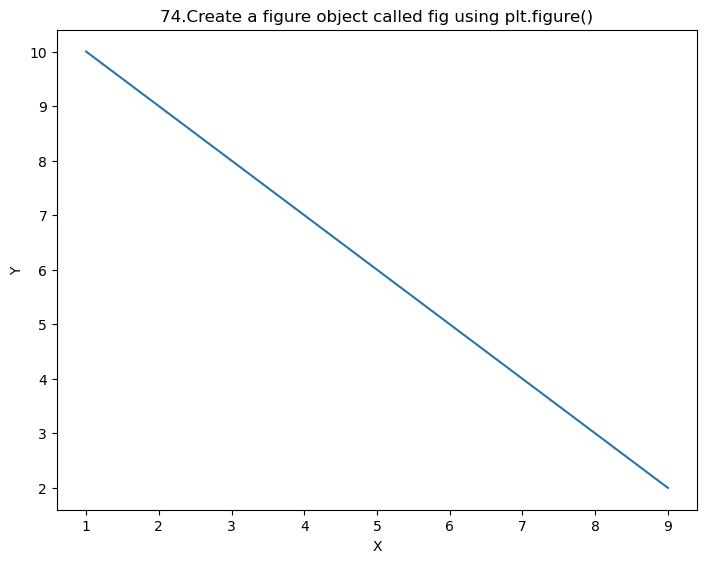

In [121]:
x = [1,3,5,7,9]
y = [10, 8, 6, 4, 2]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('74.Create a figure object called fig using plt.figure()')
plt.show()

# 75.Using numpy functions, multiply the following arrays a=np.arange(6).reshape(2,3) b=np.arange(6).reshape(3,2)

In [167]:
import numpy as np
a = np.arange(6).reshape(2,3)
b = np.arange(6).reshape(3,2)
print('multiplied a and b is: \n', np.dot(a, b))

multiplied a and b is: 
 [[10 13]
 [28 40]]


# 76.Mortality O:E

In [171]:
df = pd.read_excel('HospitalDatabase.xlsx','Discharges')
df = pd.DataFrame(df, columns=['DischargeDisposition','ExpectedMortality','PatientID'])

# calculate the O:E ratio
df['o_e_ratio'] = df['DischargeDisposition'] / df['ExpectedMortality']

# display the resulting DataFrame
print(df)


TypeError: unsupported operand type(s) for /: 'str' and 'float'

# 77.Plot a graph to count the patients based on discharge disposition.

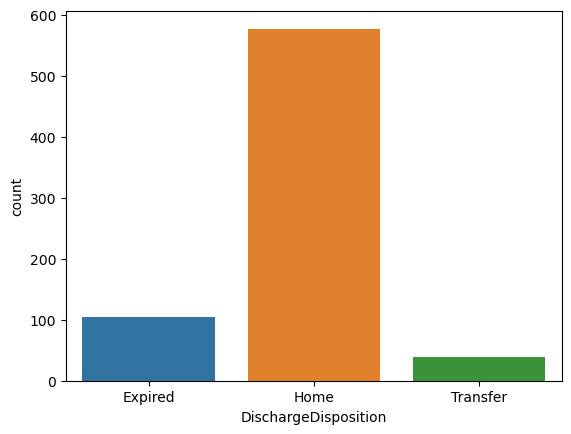

In [47]:
df = pd.read_excel('HospitalDatabase.xlsx','Discharges')
df = pd.DataFrame(df, columns=['DischargeDisposition','PatientID'])
sns.countplot(x ='DischargeDisposition', data = df)
plt.show()

# 78.Display total count of patients service wise based on gender.

In [180]:
df1 = pd.read_excel('HospitalDatabase.xlsx','Patients')
df2 = pd.read_excel('HospitalDatabase.xlsx','ReAdmissionRegistry')
df = pd.merge(df1, df2, on='PatientID')
df = df.groupby(['Service']).Gender.value_counts()
print (df)

Service           Gender
Cardiology        Male       54
                  Female     41
General Medicine  Male      149
                  Female    114
Hospitalist       Male       66
                  Female     35
ICU               Male       86
                  Female     65
Neurology         Female     34
                  Male       31
Orthopeadics      Male       23
                  Female     22
Name: Gender, dtype: int64


# 79.Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

In [151]:
df=pd.read_excel('HospitalDatabase.xlsx','ReAdmissionRegistry')
pivot = df.pivot_table(index=['Service','PrimaryDiagnosis'],
                    values=['ExpectedLOS'],
                    aggfunc='mean')
print(pivot)

                                     ExpectedLOS
Service          PrimaryDiagnosis               
Cardiology       AMI                   12.414202
                 Afib                  13.162920
                 Broken Leg             3.911826
                 Flu                    3.970428
                 Heart Failure         13.014044
                 Kidney Failure         6.580273
General Medicine Broken Leg             3.368132
                 Diabetes               5.665298
                 Fever                  6.803796
                 Flu                    6.141753
                 Hypertension           5.369365
                 Kidney Failure         5.943163
                 Laceration             6.771154
                 Pneumonia              6.140270
                 Stroke                 7.173333
Hospitalist      AMI                   13.828290
                 Broken Leg             7.125069
                 Diabetes               7.874359
                 Fev

# 80.Display the data for all 'White Female' patients above the age of 50.

In [179]:
df = pd.read_excel('HospitalDatabase.xlsx','Patients')
#calculate Age
df['Age']=(now - df['DateOfBirth']).astype('<m8[Y]') 
rs_df = df[(df['Race'] == 'White') & (df['Gender']=='Female') & (df['Age'] > 50)]
print("Count of White Female patients above the age of 50 is:"+str(len(rs_df)))

Count of White Female patients above the age of 50 is:117
